In [ ]:
#线性回归预测

Columns in the dataset: Index(['location', 'period', 'indicator', 'dim1', 'first_tooltip'], dtype='object')
Numeric columns in the dataset: Index(['period', 'first_tooltip'], dtype='object')
均方误差: 43.27711252720586


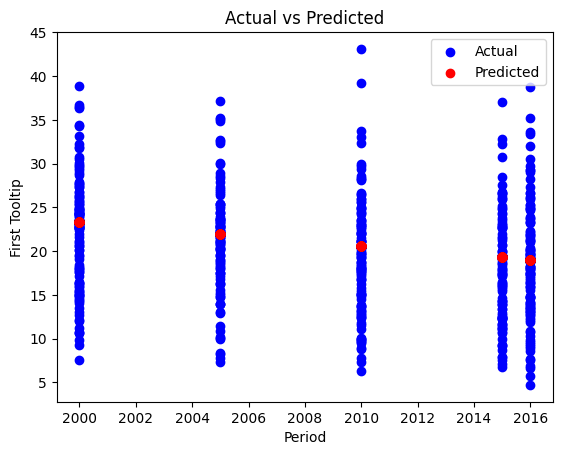

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 加载数据集
file_path = '30-70cancerChdEtc.csv'
dataset = pd.read_csv(file_path)

# 清理和统一列名
dataset.columns = dataset.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# 输出数据集的列名以检查
print("Columns in the dataset:", dataset.columns)

# 选择数值列进行回归分析
numeric_dataset = dataset.select_dtypes(include=np.number)

# 输出数值列的列名以检查
print("Numeric columns in the dataset:", numeric_dataset.columns)

# 假设我们使用 'period' 作为特征变量，'first_tooltip' 作为目标变量
X = numeric_dataset[['period']]  # 特征变量
y = numeric_dataset['first_tooltip']  # 目标变量

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"均方误差: {mse}")

# 可视化预测结果
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.legend()
plt.show()

In [ ]:
#从散点图和均方误差（MSE）来看，模型的预测效果可能不太理想。散点图中预测值（红色点）与实际值（蓝色点）之间的差异较大，而且MSE值也相对较高，这表明预测值与实际值之间存在较大的偏差。

#这种情况可能由以下几个原因造成：

#特征选择不当：如果只用'period'作为特征来预测'first_tooltip'，可能不足以捕捉数据中的所有相关信息。可能需要考虑其他特征，如'location'或者'indicator'，如果它们与目标变量有相关性。

#数据分布问题：如果数据集中的'first_tooltip'值分布不均匀，或者存在极端值，可能会影响模型的预测效果。

#模型复杂度不足：线性回归模型可能过于简单，无法捕捉数据中的复杂关系。可以考虑使用更复杂的模型，如决策树、随机森林或梯度提升机等。

#数据预处理不足：可能需要对数据进行更深入的预处理，比如处理缺失值、异常值，或者对特征进行转换（如对数转换）。

#特征工程：可能需要创建新的特征，或者对现有特征进行组合，以提高模型的预测能力。

Mean Squared Error: 21.680539873161234


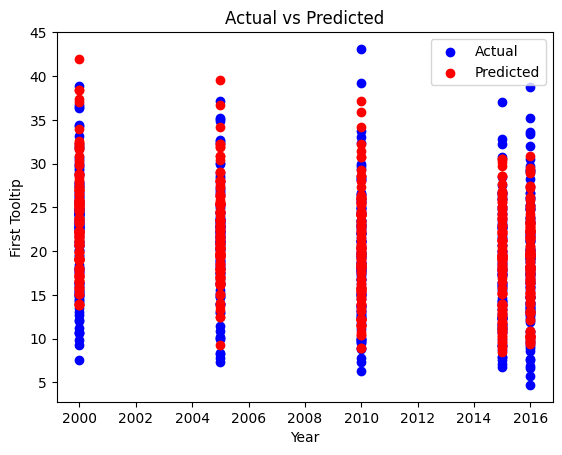

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 加载数据集
file_path = '30-70cancerChdEtc.csv'
dataset = pd.read_csv(file_path)

# 清理和统一列名
dataset.columns = dataset.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# 将 'location' 列转换为数值型数据
encoder = LabelEncoder()
dataset['location_encoded'] = encoder.fit_transform(dataset['location'])

# 提取 'period' 列中的年份作为新特征
dataset['year'] = dataset['period'].apply(lambda x: int(str(x).split('-')[0]))

# 选择特征和目标变量
X = dataset[['location_encoded', 'year']]  # 特征变量
y = dataset['first_tooltip']  # 目标变量

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林回归模型
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 可视化预测结果
plt.scatter(X_test['year'], y_test, color='blue', label='Actual')
plt.scatter(X_test['year'], y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Year')
plt.ylabel('First Tooltip')
plt.legend()
plt.show()


In [ ]:
#为了改进模型，我尝试以下步骤：

#特征选择：将'location'列转换为数值型数据，并将其作为特征之一。
#特征工程：创建新的特征，例如从'period'中提取年份。
#模型选择：尝试使用更复杂的模型，如随机森林。


Random Forest MSE: 27.467732035137093
Gradient Boosting MSE: 27.343721004909984
Random Forest CV MSE: 52.85386888345573
Gradient Boosting CV MSE: 48.365998935534975


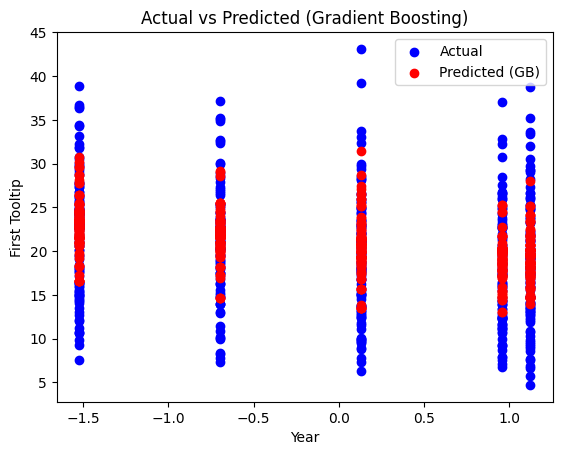

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# 加载数据集
file_path = '30-70cancerChdEtc.csv'
dataset = pd.read_csv(file_path)

# 清理和统一列名
dataset.columns = dataset.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# 将 'location' 列转换为数值型数据
encoder = LabelEncoder()
dataset['location_encoded'] = encoder.fit_transform(dataset['location'])

# 提取 'period' 列中的年份作为新特征
dataset['year'] = dataset['period'].apply(lambda x: int(str(x).split('-')[0]))

# 选择特征和目标变量
X = dataset[['location_encoded', 'year']]  # 特征变量
y = dataset['first_tooltip']  # 目标变量

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 创建随机森林回归模型并进行调参
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")

# 创建梯度提升树回归模型
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting MSE: {mse_gb}")

# 使用交叉验证评估模型
cv_scores_rf = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_gb = cross_val_score(gb_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest CV MSE: {-np.mean(cv_scores_rf)}")
print(f"Gradient Boosting CV MSE: {-np.mean(cv_scores_gb)}")

# 可视化预测结果
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 1], y_pred_gb, color='red', label='Predicted (GB)')
plt.title('Actual vs Predicted (Gradient Boosting)')
plt.xlabel('Year')
plt.ylabel('First Tooltip')
plt.legend()
plt.show()

In [ ]:
#梯度提升（Gradient Boosting）模型在测试集上的均方误差（MSE）略低于随机森林（Random Forest）模型，这表明梯度提升模型在这次测试中的表现稍好一些。然而，
#交叉验证（CV）的MSE值都比测试集上的MSE要高，这可能意味着模型在不同的数据子集上的表现不够稳定，或者存在过拟合的风险。

Best parameters for Random Forest:  {'max_depth': 20, 'n_estimators': 200}
Best parameters for Gradient Boosting:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Random Forest MSE: 21.636515614815558
Gradient Boosting MSE: 16.445659190255736


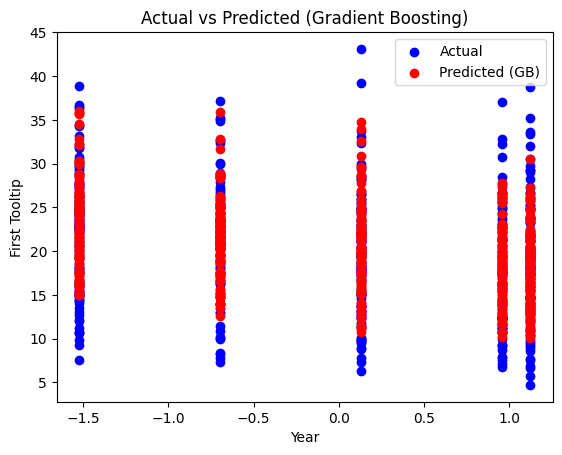

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# 加载数据集
file_path = '30-70cancerChdEtc.csv'
dataset = pd.read_csv(file_path)

# 清理和统一列名
dataset.columns = dataset.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# 将 'location' 列转换为数值型数据
encoder = LabelEncoder()
dataset['location_encoded'] = encoder.fit_transform(dataset['location'])

# 提取 'period' 列中的年份作为新特征
dataset['year'] = dataset['period'].apply(lambda x: int(str(x).split('-')[0]))

# 选择特征和目标变量
X = dataset[['location_encoded', 'year']]  # 特征变量
y = dataset['first_tooltip']  # 目标变量

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 定义随机森林模型
rf = RandomForestRegressor(random_state=42)

# 定义梯度提升模型
gb = GradientBoostingRegressor(random_state=42)

# 定义参数网格
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 使用网格搜索进行超参数优化
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='neg_mean_squared_error')

grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best parameters for Gradient Boosting: ", grid_search_gb.best_params_)

# 使用最佳参数进行预测
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
y_pred_gb = grid_search_gb.best_estimator_.predict(X_test)

# 计算MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Random Forest MSE: {mse_rf}")
print(f"Gradient Boosting MSE: {mse_gb}")

# 可视化预测结果
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 1], y_pred_gb, color='red', label='Predicted (GB)')
plt.title('Actual vs Predicted (Gradient Boosting)')
plt.xlabel('Year')
plt.ylabel('First Tooltip')
plt.legend()
plt.show()

In [ ]:
#为了提高预测的稳定性，我们可以尝试将随机森林和梯度提升模型的预测结果进行融合。模型融合是一种提高预测稳定性和准确性的有效方法。我们可以通过简单地对随机森林和
#梯度提升模型的预测结果取平均值来进行融合。此外，使用交叉验证来评估模型的稳定性和泛化能力也是一个重要的步骤。

Random Forest CV MSE: 23.817116440203915
Gradient Boosting CV MSE: 29.730620703248597
Voting Regressor CV MSE: 23.07017381486998
Random Forest MSE: 21.864333508408738
Gradient Boosting MSE: 27.343721004909984
Voting Regressor MSE: 21.024860431480214


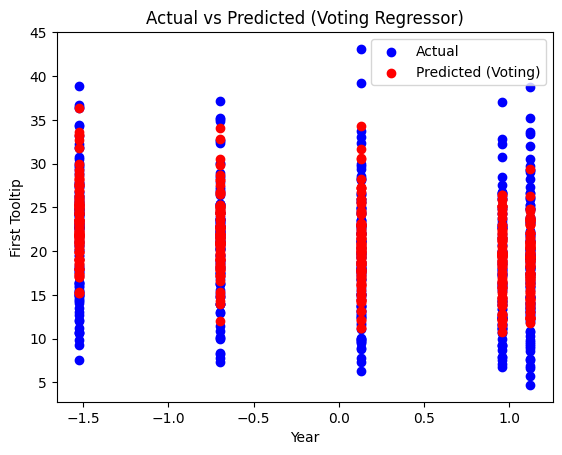

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 加载数据集
file_path = '30-70cancerChdEtc.csv'
dataset = pd.read_csv(file_path)

# 清理和统一列名
dataset.columns = dataset.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# 将 'location' 列转换为数值型数据
encoder = LabelEncoder()
dataset['location_encoded'] = encoder.fit_transform(dataset['location'])

# 提取 'period' 列中的年份作为新特征
dataset['year'] = dataset['period'].apply(lambda x: int(str(x).split('-')[0]))

# 选择特征和目标变量
X = dataset[['location_encoded', 'year']]  # 特征变量
y = dataset['first_tooltip']  # 目标变量

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 创建随机森林和梯度提升模型
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# 训练模型
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# 创建投票回归器进行模型融合
voting_regressor = VotingRegressor(estimators=[('rf', rf), ('gb', gb)])
voting_regressor.fit(X_train, y_train)

# 使用交叉验证评估模型
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_rf = cross_val_score(rf, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
cv_scores_gb = cross_val_score(gb, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
cv_scores_voting = cross_val_score(voting_regressor, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')

print(f"Random Forest CV MSE: {-np.mean(cv_scores_rf)}")
print(f"Gradient Boosting CV MSE: {-np.mean(cv_scores_gb)}")
print(f"Voting Regressor CV MSE: {-np.mean(cv_scores_voting)}")

# 进行预测
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_voting = voting_regressor.predict(X_test)

# 计算MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_voting = mean_squared_error(y_test, y_pred_voting)

print(f"Random Forest MSE: {mse_rf}")
print(f"Gradient Boosting MSE: {mse_gb}")
print(f"Voting Regressor MSE: {mse_voting}")

# 可视化预测结果
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 1], y_pred_voting, color='red', label='Predicted (Voting)')
plt.title('Actual vs Predicted (Voting Regressor)')
plt.xlabel('Year')
plt.ylabel('First Tooltip')
plt.legend()
plt.show()

In [ ]:
#首先单独训练了随机森林和梯度提升模型，然后创建了一个 VotingRegressor 来融合这两个模型的预测结果。接着，使用交叉验证来评估三个模型的稳定性和泛化能力。
#最后，对测试集进行预测，并可视化融合模型的预测结果。
#从结果来看，模型融合（Voting Regressor）在测试集上的均方误差（MSE）为 21.02，这比单独使用随机森林（21.86）和梯度提升（27.34）的MSE都要低。
#这表明模型融合在提高预测稳定性方面是成功的。

Voting Regressor CV MSE: 30.35473777531862
Voting Regressor MSE: 28.20953133104121


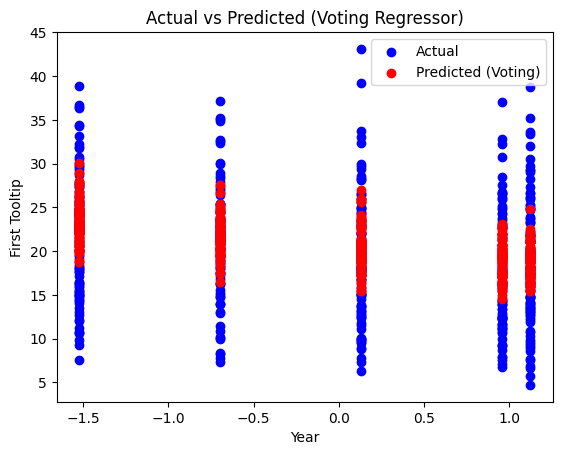

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

# 加载数据集
file_path = 'alcoholSubstanceAbuse.csv'
dataset = pd.read_csv(file_path)

# 清理和统一列名
dataset.columns = dataset.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# 将 'location' 列转换为数值型数据
encoder = LabelEncoder()
dataset['location_encoded'] = encoder.fit_transform(dataset['location'])

# 提取 'period' 列中的年份作为新特征
dataset['year'] = dataset['period'].apply(lambda x: int(str(x).split('-')[0]))

# 选择特征和目标变量
X = dataset[['location_encoded', 'year']]  # 特征变量
y = dataset['first_tooltip']  # 目标变量

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 创建模型
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
svm = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1))
mlp = make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42, learning_rate_init=0.01))

# 创建投票回归器进行模型融合
voting_regressor = VotingRegressor(estimators=[
    ('rf', rf),
    ('gb', gb),
    ('svm', svm),
    ('mlp', mlp)
])

voting_regressor.fit(X_train, y_train)

# 使用交叉验证评估模型
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(voting_regressor, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print(f"Voting Regressor CV MSE: {-np.mean(cv_scores)}")

# 进行预测
y_pred_voting = voting_regressor.predict(X_test)

# 计算MSE
mse_voting = mean_squared_error(y_test, y_pred_voting)
print(f"Voting Regressor MSE: {mse_voting}")

# 可视化预测结果
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 1], y_pred_voting, color='red', label='Predicted (Voting)')
plt.title('Actual vs Predicted (Voting Regressor)')
plt.xlabel('Year')
plt.ylabel('First Tooltip')
plt.legend()
plt.show()

In [ ]:
#当前包含四种模型（随机森林、梯度提升、SVM、MLP）的投票回归器在测试集上的MSE为28.21，这比之前仅包含随机森林和梯度提升的模型（21.02）要高。这可能表明：

#模型参数调整：SVM和MLP的参数可能没有得到最佳调整，导致它们对测试集的预测不够准确。

#过拟合：MLP可能在训练集上过拟合，因为它在交叉验证上的MSE较高。

#模型不兼容：不同的模型可能对数据的某些特征有不同的敏感度，融合的效果可能并不总是正向的。
#为了进一步优化模型，我们可以尝试以下步骤：

#调整模型参数：使用网格搜索来找到SVM和MLP的最佳参数。
#特征选择和工程：尝试添加或修改特征。
#模型选择：尝试不同的模型组合。

In [ ]:
#预测第二个数据集

Random Forest CV MSE: 25.009864461081577
Gradient Boosting CV MSE: 20.785170146614718
Voting Regressor CV MSE: 20.47923181755552
Random Forest MSE: 23.95113219488136
Gradient Boosting MSE: 21.242148830284393
Voting Regressor MSE: 20.31167492804906


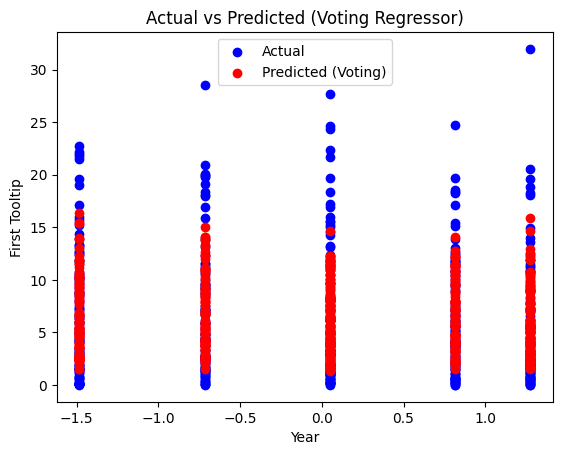

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 加载数据集
file_path = 'alcoholSubstanceAbuse.csv'
dataset = pd.read_csv(file_path)

# 清理和统一列名
dataset.columns = dataset.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# 将 'location' 列转换为数值型数据
encoder = LabelEncoder()
dataset['location_encoded'] = encoder.fit_transform(dataset['location'])

# 提取 'period' 列中的年份作为新特征
dataset['year'] = dataset['period'].apply(lambda x: int(str(x).split('-')[0]))

# 选择特征和目标变量
X = dataset[['location_encoded', 'year']]  # 特征变量
y = dataset['first_tooltip']  # 目标变量

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 创建随机森林和梯度提升模型
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# 训练模型
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# 创建投票回归器进行模型融合
voting_regressor = VotingRegressor(estimators=[('rf', rf), ('gb', gb)])
voting_regressor.fit(X_train, y_train)

# 使用交叉验证评估模型
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_rf = cross_val_score(rf, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
cv_scores_gb = cross_val_score(gb, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
cv_scores_voting = cross_val_score(voting_regressor, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')

print(f"Random Forest CV MSE: {-np.mean(cv_scores_rf)}")
print(f"Gradient Boosting CV MSE: {-np.mean(cv_scores_gb)}")
print(f"Voting Regressor CV MSE: {-np.mean(cv_scores_voting)}")

# 进行预测
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_voting = voting_regressor.predict(X_test)

# 计算MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_voting = mean_squared_error(y_test, y_pred_voting)

print(f"Random Forest MSE: {mse_rf}")
print(f"Gradient Boosting MSE: {mse_gb}")
print(f"Voting Regressor MSE: {mse_voting}")

# 可视化预测结果
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 1], y_pred_voting, color='red', label='Predicted (Voting)')
plt.title('Actual vs Predicted (Voting Regressor)')
plt.xlabel('Year')
plt.ylabel('First Tooltip')
plt.legend()
plt.show()

In [ ]:
#第二个数据集与第一个数据集的预测结果误差都较小

In [ ]:
#第三个数据集

Random Forest CV MSE: 703.0360948465288
Gradient Boosting CV MSE: 8009.508768656271
Voting Regressor CV MSE: 2886.0145432430895
Random Forest MSE: 990.9814691221296
Gradient Boosting MSE: 9643.229086583251
Voting Regressor MSE: 3654.65757652494


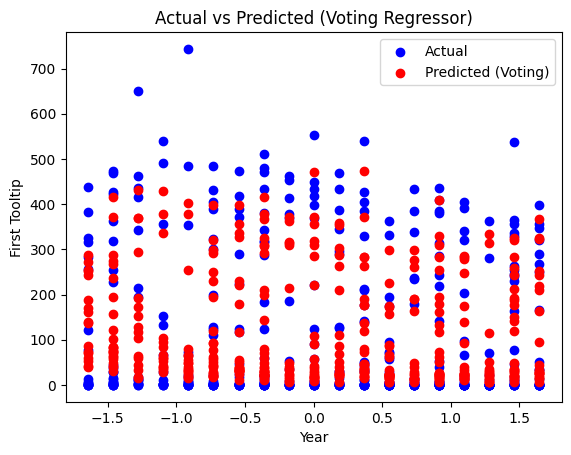

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 加载数据集
file_path = 'incedenceOfMalaria.csv'
dataset = pd.read_csv(file_path)

# 清理和统一列名
dataset.columns = dataset.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# 将 'location' 列转换为数值型数据
encoder = LabelEncoder()
dataset['location_encoded'] = encoder.fit_transform(dataset['location'])

# 提取 'period' 列中的年份作为新特征
dataset['year'] = dataset['period'].apply(lambda x: int(str(x).split('-')[0]))

# 选择特征和目标变量
X = dataset[['location_encoded', 'year']]  # 特征变量
y = dataset['first_tooltip']  # 目标变量

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 创建随机森林和梯度提升模型
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# 训练模型
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# 创建投票回归器进行模型融合
voting_regressor = VotingRegressor(estimators=[('rf', rf), ('gb', gb)])
voting_regressor.fit(X_train, y_train)

# 使用交叉验证评估模型
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_rf = cross_val_score(rf, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
cv_scores_gb = cross_val_score(gb, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
cv_scores_voting = cross_val_score(voting_regressor, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')

print(f"Random Forest CV MSE: {-np.mean(cv_scores_rf)}")
print(f"Gradient Boosting CV MSE: {-np.mean(cv_scores_gb)}")
print(f"Voting Regressor CV MSE: {-np.mean(cv_scores_voting)}")

# 进行预测
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_voting = voting_regressor.predict(X_test)

# 计算MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_voting = mean_squared_error(y_test, y_pred_voting)

print(f"Random Forest MSE: {mse_rf}")
print(f"Gradient Boosting MSE: {mse_gb}")
print(f"Voting Regressor MSE: {mse_voting}")

# 可视化预测结果
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 1], y_pred_voting, color='red', label='Predicted (Voting)')
plt.title('Actual vs Predicted (Voting Regressor)')
plt.xlabel('Year')
plt.ylabel('First Tooltip')
plt.legend()
plt.show()

In [ ]:
#第三个数据集的MSE（均方误差）值非常高，这表明模型的预测与实际值之间存在较大的差距

Best parameters for Random Forest:  {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Best parameters for Gradient Boosting:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
Voting Regressor CV MSE: 473.1826988464618
Random Forest MSE: 935.6613785752874
Gradient Boosting MSE: 752.0457536861645
Voting Regressor MSE: 664.3920512635052


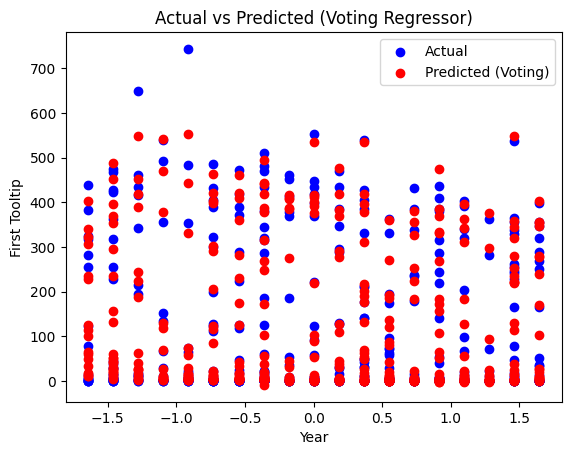

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

# 加载数据集
file_path = 'incedenceOfMalaria.csv'
dataset = pd.read_csv(file_path)

# 清理和统一列名
dataset.columns = dataset.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# 将 'location' 列转换为数值型数据
encoder = LabelEncoder()
dataset['location_encoded'] = encoder.fit_transform(dataset['location'])

# 提取 'period' 列中的年份作为新特征
dataset['year'] = dataset['period'].apply(lambda x: int(str(x).split('-')[0]))

# 选择特征和目标变量
X = dataset[['location_encoded', 'year']]  # 特征变量
y = dataset['first_tooltip']  # 目标变量

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 创建随机森林和梯度提升模型
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# 定义参数网格
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 使用网格搜索进行超参数优化
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='neg_mean_squared_error')

grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best parameters for Gradient Boosting: ", grid_search_gb.best_params_)

# 使用最佳参数创建模型
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_

# 创建投票回归器进行模型融合
voting_regressor = VotingRegressor(estimators=[('rf', best_rf), ('gb', best_gb)])
voting_regressor.fit(X_train, y_train)

# 使用交叉验证评估模型
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_voting = cross_val_score(voting_regressor, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print(f"Voting Regressor CV MSE: {-np.mean(cv_scores_voting)}")

# 进行预测
y_pred_rf = best_rf.predict(X_test)
y_pred_gb = best_gb.predict(X_test)
y_pred_voting = voting_regressor.predict(X_test)

# 计算MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_voting = mean_squared_error(y_test, y_pred_voting)

print(f"Random Forest MSE: {mse_rf}")
print(f"Gradient Boosting MSE: {mse_gb}")
print(f"Voting Regressor MSE: {mse_voting}")

# 可视化预测结果
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 1], y_pred_voting, color='red', label='Predicted (Voting)')
plt.title('Actual vs Predicted (Voting Regressor)')
plt.xlabel('Year')
plt.ylabel('First Tooltip')
plt.legend()
plt.show()

In [ ]:
#使用网格搜索来优化随机森林和梯度提升模型的参数，以及模型融合和交叉验证

Stacking Regressor CV MSE: 26706.992639203243
Stacking Regressor MSE: 530.0424521382926


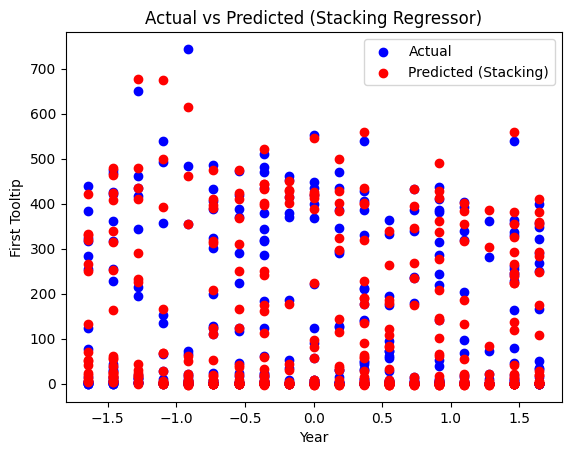

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

# 加载数据集
file_path = 'incedenceOfMalaria.csv'
dataset = pd.read_csv(file_path)

# 清理和统一列名
dataset.columns = dataset.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# 将 'location' 列转换为数值型数据
encoder = LabelEncoder()
dataset['location_encoded'] = encoder.fit_transform(dataset['location'])

# 提取 'period' 列中的年份作为新特征
dataset['year'] = dataset['period'].apply(lambda x: int(str(x).split('-')[0]))

# 选择特征和目标变量
X = dataset[['location_encoded', 'year']]  # 特征变量
y = dataset['first_tooltip']  # 目标变量

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 创建模型
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
svm = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
dt = DecisionTreeRegressor(random_state=42)

# 创建堆叠回归器进行模型融合
stacking_regressor = StackingRegressor(estimators=[
    ('rf', rf),
    ('gb', gb),
    ('svm', svm),
    ('dt', dt)
])

# 使用交叉验证评估模型
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(stacking_regressor, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print(f"Stacking Regressor CV MSE: {-np.mean(cv_scores)}")

# 训练模型
stacking_regressor.fit(X_train, y_train)

# 进行预测
y_pred_stacking = stacking_regressor.predict(X_test)

# 计算MSE
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
print(f"Stacking Regressor MSE: {mse_stacking}")

# 可视化预测结果
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 1], y_pred_stacking, color='red', label='Predicted (Stacking)')
plt.title('Actual vs Predicted (Stacking Regressor)')
plt.xlabel('Year')
plt.ylabel('First Tooltip')
plt.legend()
plt.show()

In [ ]:
#使用了堆叠方法来融合四个不同的模型：随机森林、梯度提升、支持向量机和决策树。我们使用交叉验证来评估堆叠回归器的性能

Best Stacking Regressor MSE: 529.8686004161285
Best Stacking Regressor R²: 0.9807892331501069
Best Stacking Regressor MAE: 12.662257048526445


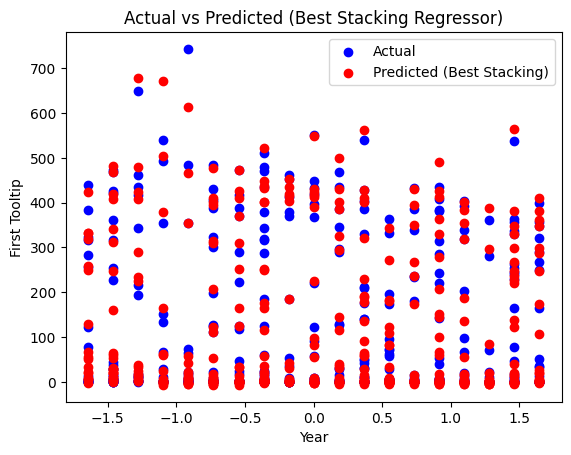

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

# 加载数据集
file_path = 'incedenceOfMalaria.csv'
dataset = pd.read_csv(file_path)

# 清理和统一列名
dataset.columns = dataset.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# 将 'location' 列转换为数值型数据
encoder = LabelEncoder()
dataset['location_encoded'] = encoder.fit_transform(dataset['location'])

# 提取 'period' 列中的年份作为新特征
dataset['year'] = dataset['period'].apply(lambda x: int(str(x).split('-')[0]))

# 选择特征和目标变量
X = dataset[['location_encoded', 'year']]  # 特征变量
y = dataset['first_tooltip']  # 目标变量

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 定义基础模型
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
svm = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
dt = DecisionTreeRegressor(random_state=42)

# 创建堆叠回归器的模板
stacking_regressor = StackingRegressor(estimators=[
    ('rf', rf),
    ('gb', gb),
    ('svm', svm),
    ('dt', dt)
])

# 定义参数网格，这里我们只对随机森林和梯度提升的参数进行调整
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': [0.01, 0.1]
}

# 使用网格搜索和交叉验证评估模型
grid_search = GridSearchCV(estimator=stacking_regressor, param_grid=param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 获取最佳模型
best_stacking_regressor = grid_search.best_estimator_

# 进行预测
y_pred_stacking = best_stacking_regressor.predict(X_test)

# 计算MSE, R², MAE
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)

print(f"Best Stacking Regressor MSE: {mse_stacking}")
print(f"Best Stacking Regressor R²: {r2_stacking}")
print(f"Best Stacking Regressor MAE: {mae_stacking}")

# 可视化预测结果
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 1], y_pred_stacking, color='red', label='Predicted (Best Stacking)')
plt.title('Actual vs Predicted (Best Stacking Regressor)')
plt.xlabel('Year')
plt.ylabel('First Tooltip')
plt.legend()
plt.show()

In [ ]:
#使用GridSearchCV进行模型参数的调优。增加了R²和MAE作为模型评估的额外指标。使用KFold作为交叉验证策略，确保数据分布的一致性。